# Covariance and Correlations

Covariance: The covariance is a measure for how two variables are related to each other, i.e., how two variables vary with each other.

$\sigma_{xy}$ = 1/n[$\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})$]

- A covariance of 0 indicates that two variables are totally unrelated. If the covariance is positive, the variables increase in the same direction, and if the covariance is negative, the variables change in opposite directions. As it can be seen in the equation above, the magnitude of the covariance depends on the scale of each variable (the size of the population or sample mean).
- By dividing the covariance by the features’ standard deviations, we ensure that the correlation between two features is in the range [-1, 1], which makes it more interpretable than the unbounded covariance. However, note that the covariance and correlation are exactly the same if the features are normalized to unit variance (e.g., via standardization or z-score normalization). Two features are perfectly positively correlated if ρ=1 and pefectly negatively correlated if ρ=−1. No correlation is observed if ρ=0.

Pearson Correlation Coefficient gives a strength of association between two variables, and also the direction in which the variability happens between the variables. It is defined as:

Correlation Coefficient = (1/n.$\sigma_{x}.\sigma_{y}$)($\sum_{i=1}^{n}(x-\bar{x})(y-\bar{y}$)
Hence, we simply divide the covariance by the standard deviation to understand the direction in which the variance is bound.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# data of monthly excess wrt market and prices
df = pd.read_csv("data/acme.csv")

In [5]:
df.head()

,Unnamed: 0,month,market,acme
0,1,1/86,-0.061134,0.030160
1,2,2/86,0.008220,-0.165457
2,3,3/86,-0.007381,0.080137
3,4,4/86,-0.067561,-0.109917
4,5,5/86,-0.006238,-0.114853


In [6]:
df.describe()

,Unnamed: 0,market,acme
count,60.000000,60.000000,60.000000
mean,30.500000,-0.051168,-0.068969
std,17.464249,0.053629,0.111572
min,1.000000,-0.262077,-0.284796
25%,15.750000,-0.079007,-0.133046
50%,30.500000,-0.044867,-0.089992
75%,45.250000,-0.011587,-0.031495
max,60.000000,0.073396,0.242616


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   month       60 non-null     object 
 2   market      60 non-null     float64
 3   acme        60 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB


In [7]:
df.isna().sum()

Unnamed: 0    0
month         0
market        0
acme          0
dtype: int64

In [21]:
# Covariance of the data
df.cov()

,Unnamed: 0,market,acme
Unnamed: 0,305.000000,-0.224922,-0.457489
market,-0.224922,0.002876,0.003258
acme,-0.457489,0.003258,0.012448


Heatmap in seaborn can take 18 arguments as per documentation:
sns.heatmap(data, vmin=None, vmax=None, cmap=None,center=None, robust=False, annot=None, fmt=’.2g’, annot_kws=None, linewidths=0, linecolor=’white’, cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels=’auto’, yticklabels=’auto’, mask=None, ax=None, **kwargs)

Let us try to understand each argument:
1. Compulsory Arguments:
    1. The main component of heatmap is the correlation function which describes the relationship between the variable ie df.corr()
    2. To display the values of correlation coefficients, we make use of annot=True else keep that False.
    3. It is possible that the correlation values may become greater than five decimal places, then we pass 'fmt' argument to make the output more readable. For example, fmt='.3g' will have correlation values upto three decimal places.
    4. vmin, vmax and center are used for rescaling the color bars
2. Design Arguments:
    1. cmap: Mention the color code of the matrix.
    2. linewidths, linecolor: Specifies the thickness and the color of the borders.
    3. By default, the legend for colorscale is vertical, we can make it horizontal using cbar_kws= {'orientation': 'horizontal'} or we can set it to False to hide it.
    4. To change the shape from rectangular to square simply pass square=True.
3. Size of Matrix:
    1. If we want to change the shape of matrix or display only a part of it then we make use of .triu() and .tril() and pass these in matrix = np.triu/tril(df.corr()) and mask=matrix to display upper half of the triangle, and the mask=tril() to display lower half of the triangle of matrix.

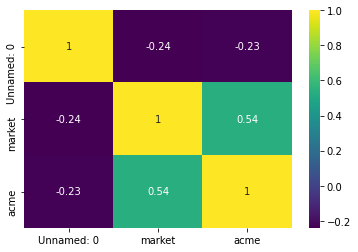

In [15]:
corr = df.corr()
matrix = sns.heatmap(corr, cmap='viridis', annot=True)

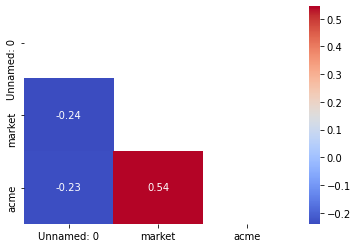

In [17]:
corr_upper = np.triu(df.corr())
matrix = sns.heatmap(corr, cmap='coolwarm', annot=True, mask=corr_upper)

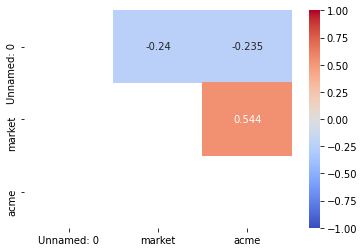

In [20]:
corr_lower = np.tril(df.corr())
matrix = sns.heatmap(corr, cmap='coolwarm', annot=True, mask=corr_lower, fmt='.3g', vmin=-1, vmax=1, center=0)